In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import gensim

import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

In [0]:
pip install paramiko

     |████████████████████████████████| 194kB 4.8MB/s 
     |████████████████████████████████| 61kB 26.1MB/s 
     |████████████████████████████████| 2.3MB 52.2MB/s 
     |████████████████████████████████| 768kB 48.1MB/s 
     |████████████████████████████████| 102kB 37.4MB/s 


In [0]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import re
import codecs
import multiprocessing
import gensim
from gensim.models import Word2Vec


def preprocess_text(text):
    text = re.sub("[^A-Za-z']+", ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


def prepare_for_w2v(filename_from, filename_to, lang):
    
    raw_text = codecs.open(filename_from, "r", encoding='utf-8').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)
            

def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    print(data)
    return Word2Vec(data, size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())

In [0]:
from gensim.models.phrases import Phrases, Phraser

In [0]:
df_demian = pd.read_fwf('drive/My Drive/Colab_Notebooks/Word2Vec/Demian_Eng.txt')
print(df_demian.shape)
print(df_demian.head())
df_demian = df_demian.dropna().reset_index(drop=True)
df_demian.isnull().sum()
df_demian.to_dict()
df_demian.head()



(5418, 1)
                                              DEMIAN
0                                           Prologue
1  I cannot tell my story without going a long wa...
2  If it were possible I would go back much farth...
3  the very earliest years of my childhood and be...
4                              to my family origins.


,DEMIAN
0,Prologue
1,I cannot tell my story without going a long wa...
2,If it were possible I would go back much farth...
3,the very earliest years of my childhood and be...
4,to my family origins.


In [0]:
df_war = pd.read_fwf('drive/My Drive/Colab_Notebooks/Word2Vec/War_and_Peace_Eng.txt')
print(df_war.shape)
print(df_war.head())
df_war = df_war.dropna().reset_index(drop=True)
df_war.isnull().sum()
df_war.to_dict()
df_war.head()

(51477, 1)
                                       WAR AND PEACE
0                                     BOOK ONE: 1805
1                                          CHAPTER I
2  “Well, Prince, so Genoa and Lucca are now just...
3  Buonapartes. But I warn you, if you don’t tell...
4  if you still try to defend the infamies and ho...


,WAR AND PEACE
0,BOOK ONE: 1805
1,CHAPTER I
2,"“Well, Prince, so Genoa and Lucca are now just..."
3,"Buonapartes. But I warn you, if you don’t tell..."
4,if you still try to defend the infamies and ho...


In [0]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [0]:
brief_cleaning_demian = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_demian["DEMIAN"])
brief_cleaning_demian

<generator object <genexpr> at 0x7f2de740d410>

In [0]:
brief_cleaning_war = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_war["WAR AND PEACE"])
brief_cleaning_war

<generator object <genexpr> at 0x7f2de73ca2b0>

In [0]:
txt_demian = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_demian, batch_size=5000, n_threads=-1)]
print(txt_demian)
df_demian_clean = pd.DataFrame({'clean': txt_demian})
df_demian_clean = df_demian_clean.dropna().drop_duplicates()
print(df_demian_clean.shape)
print(df_demian_clean.head())

[None, 'tell story go long way', None, 'early year childhood', None, 'poet write novel apt behave', 'god power look com', 'prehend human story serve', 'almighty omnipresent relate', 'naked truth able', 'poet story important', 'poet s story story', 'human invent idealised person', 'real live unique constitute real', 'live human mystery', 'day man valuable unique', 'experiment nature shoot', None, 'unique human being man jack', 'dismiss world bullet', 'point relate story', 'evcpy man unique', 'particular significant remarkable point', 'phenomenon world intersect', 'man s story', 'important eternal sacred man', 'live fulfil nature wonderful', 'creature deserve utmost attention indi', 'vidual spirit flesh', 'creation suffer saviour crucify', 'people nowadays know man feel', 'intuitively die easily reason', 'shall die easily complete story', None, 'seeker longer seeking', 'star book begin hear lesson', 'whisper blood pleasant story', 'possess gentle harmony invent tale', 'like life man give

In [0]:
txt_war = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_war, batch_size=5000, n_threads=-1)]
print(txt_war)
df_war_clean = pd.DataFrame({'clean': txt_war})
df_war_clean = df_war_clean.dropna().drop_duplicates()
print(df_war_clean.shape)
print(df_war_clean.head())

[None, None, '  prince genoa lucca family estate', 'buonaparte warn don t tell mean war', 'try defend infamy horror perpetrate', 'antichrist believe antichrist', 'longer friend longer', '  faithful slave', 'frighten sit tell news', 'july speaker know anna p vlovna', 'sch rer maid honor favorite empress m rya f dorovna', 'word greet prince vas li kur gin man high', 'rank importance arrive reception anna', 'p vlovna cough day say suffer', 'la grippe grippe new word st petersburg', None, 'invitation exception write french deliver', 'scarlet liveri footman morning run follow', '  good count prince', 'prospect spend evening poor invalid terrible', 'shall charmed tonight annette', None, '  heaven virulent attack reply prince', 'disconcert reception enter wear', 'embroider court uniform knee breech shoe star', 'breast serene expression flat face speak', 'refine french grandfather speak think', 'gentle patronizing intonation natural man importance', 'grow old society court go anna p vlovna', '

In [0]:
sent_demian = [row.split() for row in df_demian_clean['clean']]
sent_demian

[['tell', 'story', 'go', 'long', 'way'],
 ['early', 'year', 'childhood'],
 ['poet', 'write', 'novel', 'apt', 'behave'],
 ['god', 'power', 'look', 'com'],
 ['prehend', 'human', 'story', 'serve'],
 ['almighty', 'omnipresent', 'relate'],
 ['naked', 'truth', 'able'],
 ['poet', 'story', 'important'],
 ['poet', 's', 'story', 'story'],
 ['human', 'invent', 'idealised', 'person'],
 ['real', 'live', 'unique', 'constitute', 'real'],
 ['live', 'human', 'mystery'],
 ['day', 'man', 'valuable', 'unique'],
 ['experiment', 'nature', 'shoot'],
 ['unique', 'human', 'being', 'man', 'jack'],
 ['dismiss', 'world', 'bullet'],
 ['point', 'relate', 'story'],
 ['evcpy', 'man', 'unique'],
 ['particular', 'significant', 'remarkable', 'point'],
 ['phenomenon', 'world', 'intersect'],
 ['man', 's', 'story'],
 ['important', 'eternal', 'sacred', 'man'],
 ['live', 'fulfil', 'nature', 'wonderful'],
 ['creature', 'deserve', 'utmost', 'attention', 'indi'],
 ['vidual', 'spirit', 'flesh'],
 ['creation', 'suffer', 'saviour'

In [0]:
sent_war = [row.split() for row in df_war_clean['clean']]
sent_war

[['prince', 'genoa', 'lucca', 'family', 'estate'],
 ['buonaparte', 'warn', 'don', 't', 'tell', 'mean', 'war'],
 ['try', 'defend', 'infamy', 'horror', 'perpetrate'],
 ['antichrist', 'believe', 'antichrist'],
 ['longer', 'friend', 'longer'],
 ['faithful', 'slave'],
 ['frighten', 'sit', 'tell', 'news'],
 ['july', 'speaker', 'know', 'anna', 'p', 'vlovna'],
 ['sch',
  'rer',
  'maid',
  'honor',
  'favorite',
  'empress',
  'm',
  'rya',
  'f',
  'dorovna'],
 ['word', 'greet', 'prince', 'vas', 'li', 'kur', 'gin', 'man', 'high'],
 ['rank', 'importance', 'arrive', 'reception', 'anna'],
 ['p', 'vlovna', 'cough', 'day', 'say', 'suffer'],
 ['la', 'grippe', 'grippe', 'new', 'word', 'st', 'petersburg'],
 ['invitation', 'exception', 'write', 'french', 'deliver'],
 ['scarlet', 'liveri', 'footman', 'morning', 'run', 'follow'],
 ['good', 'count', 'prince'],
 ['prospect', 'spend', 'evening', 'poor', 'invalid', 'terrible'],
 ['shall', 'charmed', 'tonight', 'annette'],
 ['heaven', 'virulent', 'attack', '

In [0]:
phrases_demian = Phrases(sent_demian, min_count=30, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")


---------------------------------------------------Finished----------------------------------------------------------------------


In [0]:
phrases_war = Phrases(sent_war, min_count=30, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")


---------------------------------------------------Finished----------------------------------------------------------------------


In [0]:
bigram_demian = Phraser(phrases_demian)


In [0]:
bigram_war = Phraser(phrases_war)


In [0]:
sentences_demian = bigram_demian[sent_demian]
sentences_demian

In [0]:
sentences_war = bigram_war[sent_war]
sentences_war

In [0]:
word_freq_demian = defaultdict(int)
for sents in sentences_demian:
    for i in sents:
        word_freq_demian[i] += 1
len(word_freq_demian)

4362

In [0]:
word_freq_war = defaultdict(int)
for sents in sentences_war:
    for i in sents:
        word_freq_war[i] += 1
len(word_freq_war)

12782

In [0]:
print(sorted(word_freq_demian, key=word_freq_demian.get, reverse=True)[:10])


['s', 'world', 'like', 'know', 'time', 'demian', 'feel', 't', 'dream', 'look']


In [0]:
print(sorted(word_freq_war, key=word_freq_war.get, reverse=True)[:10])


['s', 'say', 'pierre', 'man', 'come', 'know', 'look', 'go', 'nat_sha', 'face']


In [0]:
import multiprocessing
from gensim.models import Word2Vec

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [0]:
w2v_model_demian = Word2Vec(min_count=5, window=5, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
print("-------------------------Done------------------------------------")

w2v_model_demian.build_vocab(sentences_demian, progress_per = 10000)
print("----------------------------Done------------------------------------")

total_examples_demian = w2v_model_demian.corpus_count
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True)
w2v_model_demian.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------------Done------------------------------------")
w2v_model_demian.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("----------------------------------Done------------------------------------")
w2v_model_demian.train(sentences_demian, total_examples=total_examples_demian, epochs=30, report_delay=1)
print("-------------------------------------Done----------------------------------")

w2v_model_demian.init_sims(replace=True)


-------------------------Done------------------------------------
----------------------------Done------------------------------------
-------------------------------Done------------------------------------
----------------------------------Done------------------------------------
-------------------------------------Done----------------------------------


In [0]:
w2v_model_war = Word2Vec(min_count=5, window=5, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
print("-------------------------Done------------------------------------")

w2v_model_war.build_vocab(sentences_war, progress_per = 10000)
print("----------------------------Done------------------------------------")

total_examples_war = w2v_model_war.corpus_count
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True)
w2v_model_war.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------------Done------------------------------------")
w2v_model_war.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("----------------------------------Done------------------------------------")
w2v_model_war.train(sentences_war, total_examples=total_examples_war, epochs=30, report_delay=1)
print("-------------------------------------Done----------------------------------")

w2v_model_war.init_sims(replace=True)

-------------------------Done------------------------------------
----------------------------Done------------------------------------
-------------------------------Done------------------------------------
----------------------------------Done------------------------------------
-------------------------------------Done----------------------------------


In [0]:
from sklearn.manifold import TSNE
import numpy as np


# words_alice = []
# embeddings_alice = []
# for word in list(model_alice.wv.vocab):
#     embeddings_alice.append(model_alice.wv[word])
#     words_alice.append(word)

# words_catch = []
# embeddings_catch = []
# for word in list(model_catch.wv.vocab):
#     embeddings_catch.append(model_catch.wv[word])
#     words_catch.append(word)
    
# words_prince = []
# embeddings_prince = []
# for word in list(model_prince.wv.vocab):
#     embeddings_prince.append(model_prince.wv[word])
#     words_prince.append(word)
    
words_war_peace = []
embeddings_war_peace = []
for word in list(w2v_model_war.wv.vocab):
    embeddings_war_peace.append(w2v_model_war.wv[word])
    words_war_peace.append(word)
    
# words_moby = []
# embeddings_moby = []
# for word in list(model_moby.wv.vocab):
#     embeddings_moby.append(model_moby.wv[word])
#     words_moby.append(word)
    

    
words_demian = []
embeddings_demian = []
for word in list(w2v_model_demian.wv.vocab):
    embeddings_demian.append(w2v_model_demian.wv[word])
    words_demian.append(word)

# words_demian_translated = []
# embeddings_demian_translated = []
# for word in list(model_demian_translated.wv.vocab):
#     embeddings_demian_translated.append(model_demian_translated.wv[word])
#     words_demian_translated.append(word)




In [0]:
# tsne_alice_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=5000, random_state=32)
# embeddings_alice_2d = tsne_alice_2d.fit_transform(embeddings_alice)
# print("------------Alice Done-----------")


# tsne_catch_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
# embeddings_catch_2d = tsne_catch_2d.fit_transform(embeddings_catch)
# print("------------Catch-22 Done-----------")

# tsne_prince_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000, random_state=32)
# embeddings_prince_2d = tsne_prince_2d.fit_transform(embeddings_prince)
# print("------------The Little Prince Done-----------")

tsne_war_peace_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=5000, random_state=32)
embeddings_war_peace_2d = tsne_war_peace_2d.fit_transform(embeddings_war_peace)
print("------------War and Peace Done-----------")

# tsne_moby_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000, random_state=32)
# embeddings_moby_2d = tsne_moby_2d.fit_transform(embeddings_moby)
# print("------------Mobydick Done-----------")

tsne_demian_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
embeddings_demian_2d = tsne_demian_2d.fit_transform(embeddings_demian)
print("------------Demian Done-----------")

# tsne_demian_translated_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
# embeddings_demian_translated_2d = tsne_demian_translated_2d.fit_transform(embeddings_demian_translated)
# print("------------Demian Translated Done-----------")

------------War and Peace Done-----------
------------Demian Done-----------


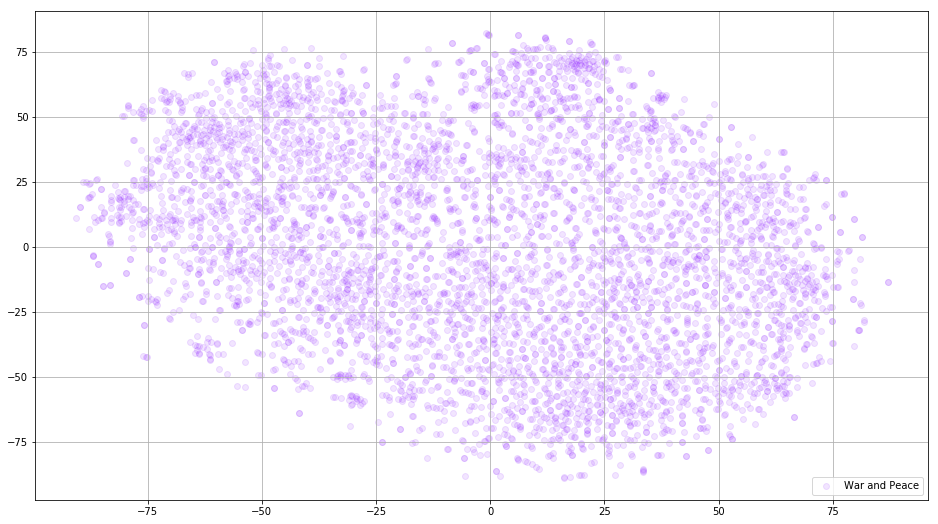

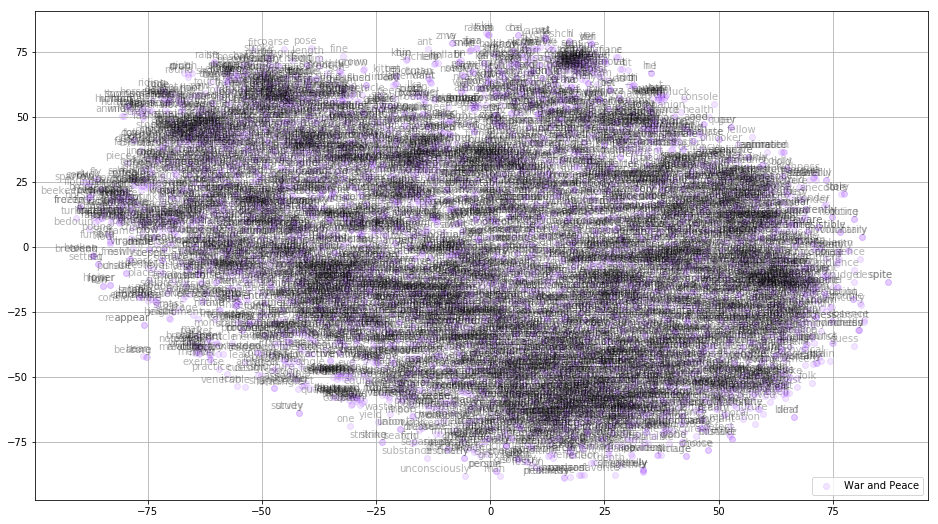

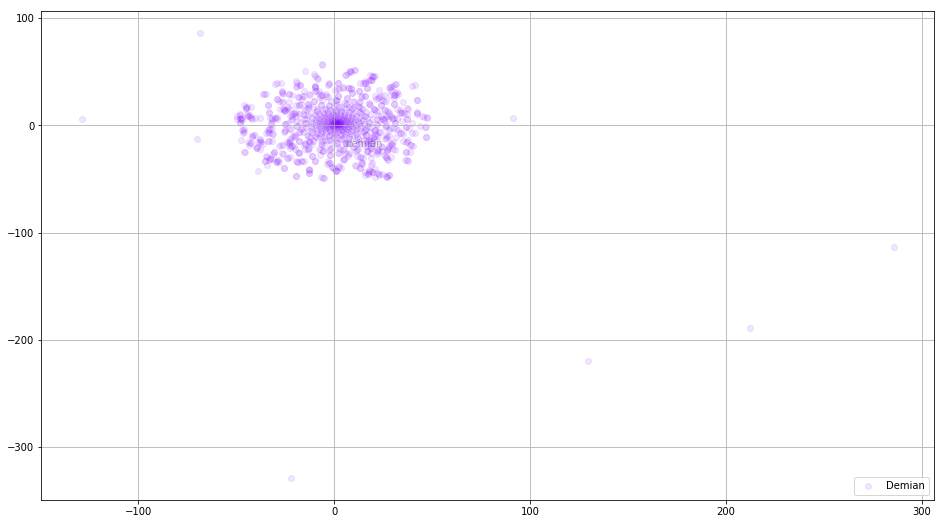

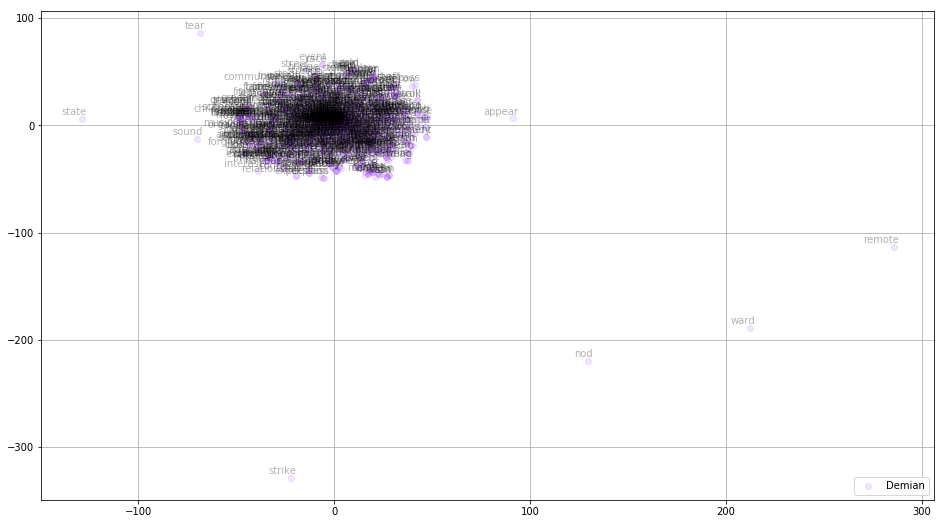

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    name = label +".png"
    plt.savefig(name, format='png', dpi=150, bbox_inches='tight')
    plt.show()

# tsne_plot_2d('Alice in Wonderland', embeddings_alice_2d, ["Alice"], a=0.1)
# tsne_plot_2d('Catch-22', embeddings_catch_2d, a=0.1)
# tsne_plot_2d('The Little Prince', embeddings_prince_2d, a=0.1)
tsne_plot_2d('War and Peace', embeddings_war_peace_2d, a=0.1)
tsne_plot_2d('War and Peace', embeddings_war_peace_2d, words_war_peace, a=0.1)
tsne_plot_2d('Demian', embeddings_demian_2d, ["demian"], a=0.1)
tsne_plot_2d('Demian', embeddings_demian_2d, words_demian, a=0.1)

#tsne_plot_2d('Demian_translated', embeddings_demian_translated_2d, ["I"], a=0.1)
# tsne_plot_2d('Moby', embeddings_moby_2d, a=0.1)

In [0]:
tsne_demian_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_demian_3d = tsne_demian_3d.fit_transform(embeddings_demian)

tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_war_peace)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


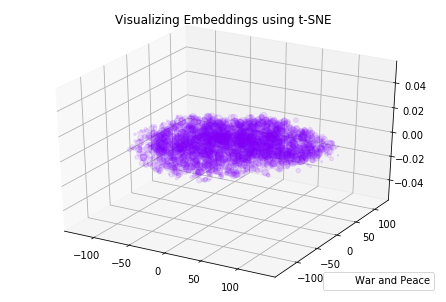

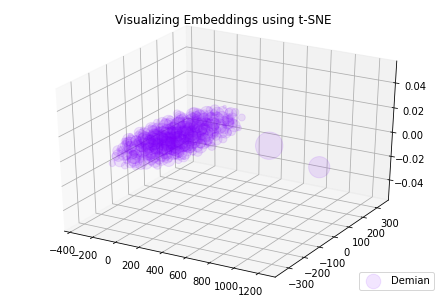

In [0]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'War and Peace', embeddings_wp_3d, a=0.1)
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Demian', embeddings_demian_3d, a=0.1)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


72
72


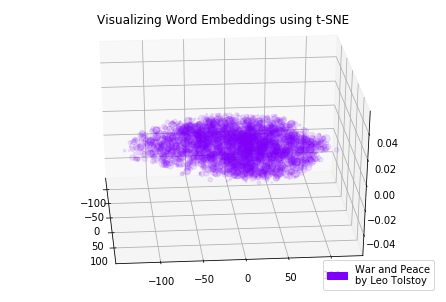

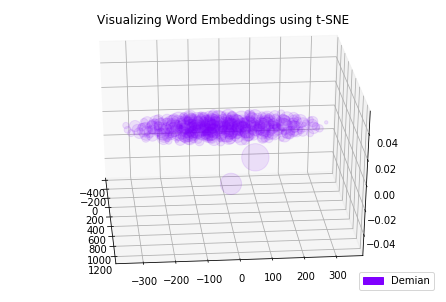

In [0]:
import matplotlib.patheffects as PathEffects
import tempfile
import imageio
import shutil

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import os


def tsne_plot_3d_gif(title, label, embeddings, filename, a):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a)

    plt.title(title)

    red_patch = mpatches.Patch(color=colors[0], label=label)
    plt.legend(handles=[red_patch], loc=4)

    dirpath = tempfile.mkdtemp()
    images = []
    z = 0
    for angle in range(0, 360, 5):
        ax.view_init(30, angle)
        fname = os.path.join(dirpath, str(angle) + '.png')
        plt.savefig(fname, dpi=120, format='png', bbox_inches='tight')
        images.append(imageio.imread(fname))
        z+=1
    imageio.mimsave(filename, images)
    shutil.rmtree(dirpath)
    print(z)


tsne_plot_3d_gif('Visualizing Word Embeddings using t-SNE', 'War and Peace\nby Leo Tolstoy',
                                  embeddings_wp_3d, 'War.gif', 0.1)
tsne_plot_3d_gif('Visualizing Word Embeddings using t-SNE', 'Demian',
                                  embeddings_demian_3d, 'Demian.gif', 0.1)

In [0]:
from IPython.display import display, Image
Image(filename="moby", format = 'gif')

ValueError: ignored

In [0]:
from ipywidgets import Image
from IPython import display
animatedGif = "./moby.gif" #path relative to your notebook
file = open(animatedGif , "rb")
image = file.read()
progress= Image(
    value=image,
    format='gif',
    width=100,
    height=100)
display.display(progress)

In [0]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

In [0]:
keys_gif = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters_gif = []
word_clusters_gif = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_ak.most_similar(word, topn=200):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters_gif.append(embeddings)
    word_clusters_gif.append(words)

In [0]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [0]:
model_demian.wv.most_similar(positive=["sinclair"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('but', 0.9999202489852905),
 ('we', 0.9999165534973145),
 ('what', 0.9999164342880249),
 ('to', 0.9999157190322876),
 ('who', 0.999914824962616),
 ('must', 0.9999145269393921),
 ('about', 0.999913215637207),
 ('that', 0.9999128580093384),
 ('then', 0.9999125599861145),
 ('so', 0.9999105334281921)]

In [0]:
# prepare_for_w2v('drive/My Drive/Colab_Notebooks/Word2Vec/alice_in_wonderland.txt', 'train_alice.txt', 'english')
# prepare_for_w2v('drive/My Drive/Colab_Notebooks/Word2Vec/Catch_22.txt', 'train_catch.txt', 'english')
# prepare_for_w2v('drive/My Drive/Colab_Notebooks/Word2Vec/the_little_prince.txt', 'train_prince.txt', 'english')
# prepare_for_w2v('drive/My Drive/Colab_Notebooks/Word2Vec/war_and_peace.txt', 'train_war_peace.txt', 'english')
prepare_for_w2v('drive/My Drive/Colab_Notebooks/Word2Vec/Demian_Eng.txt', 'train_demian.txt', 'english')
#prepare_for_w2v('drive/My Drive/Colab_Notebooks/Word2Vec/Demian_Eng_Machine_Translated.txt', 'train_demian_translated.txt', 'english')
# prepare_for_w2v('drive/My Drive/Colab_Notebooks/Word2Vec/mobydick.txt', 'train_moby.txt', 'english')


# model_alice = train_word2vec('./train_alice.txt')
# model_catch = train_word2vec('./train_catch.txt')
# model_prince = train_word2vec('./train_prince.txt')
# model_war_peace = train_word2vec('./train_war_peace.txt')
model_demian = train_word2vec('./train_demian.txt')
model_demian_translated = train_word2vec('./train_demian_translated.txt')

# model_moby = train_word2vec('./train_moby.txt')


